# StatError

In [2]:
import pyhf
import importlib

In [48]:
spec = {
    'channels': [
        {
            'name': 'firstchannel',
            'samples': [
                {
                    'name': 'mu',
                    'data': [10.,10.],
                    'modifiers': [
                        {'name': 'mu', 'type': 'normfactor', 'data': None}
                    ]
                },
                {
                    'name': 'bkg1',
                    'data': [50.0, 70.0],
                    'modifiers': [
                        {'name': 'stat_firstchannel', 'type': 'staterror', 'data': [10.,10.]}
                    ]
                },
                {
                    'name': 'bkg2',
                    'data': [30.0, 20.],
                    'modifiers': [
                        {'name': 'stat_firstchannel', 'type': 'staterror', 'data': [5.,5.]}
                    ]
                },
                {
                    'name': 'bkg3',
                    'data': [20.0, 15.0],
                    'modifiers': [
                    ]
                }
            ]
        },
#         {
#             'name': 'secondchannel',
#             'samples': [
#                 {
#                     'name': 'bkg2',
#                     'data': [30.0],
#                     'modifiers': [
#                         {'name': 'stat_secondchannel', 'type': 'staterror', 'data': [5.]}
#                     ]
#                 }
#             ]
#         }
    ]
}
p = pyhf.Model(spec)

In [49]:
# se = p.config.modifier('stat_firstchannel')

In [50]:
tensorlib = pyhf.tensorlib

In [51]:
inquad = tensorlib.sqrt(tensorlib.sum(tensorlib.power(se.uncertainties,2), axis=0))
totals = tensorlib.sum(se.nominal_counts,axis=0)
uncrts = tensorlib.divide(inquad,totals)
uncrts

array([0.16666667, 0.25      ])

In [52]:
se.pdf(se.auxdata,[1.0,1.0])

array([2.39365368, 1.59576912])

In [53]:
# p.config.par_slice('stat_firstchannel')

In [54]:
p.config.auxdata

[1.0, 1.0]

In [55]:
p.spec['channels'][0]['samples'][1]

{'name': 'bkg1',
 'data': [50.0, 70.0],
 'modifiers': [{'name': 'stat_firstchannel',
   'type': 'staterror',
   'data': [10.0, 10.0]}]}

In [56]:
import pyhf
import json
import logging
from pyhf import runOnePoint, Model
from pyhf.simplemodels import hepdata_like

def invert_interval(testmus,cls_obs, cls_exp, test_size = 0.05):
    point05cross = {'exp':[],'obs':None}
    for cls_exp_sigma in cls_exp:
        yvals = [x for x in cls_exp_sigma]
        point05cross['exp'].append(np.interp(test_size,list(reversed(yvals)),list(reversed(testmus))))
        
    yvals = cls_obs
    point05cross['obs'] = np.interp(test_size,list(reversed(yvals)),list(reversed(testmus)))
    return point05cross

def plot_results(testmus,cls_obs, cls_exp, test_size = 0.05):
    plt.plot(mutests,cls_obs, c = 'k')
    for i,c in zip(range(5),['grey','grey','grey','grey','grey']):
        plt.plot(mutests,cls_exp[i], c = c)
    plt.plot(testmus,[test_size]*len(testmus), c = 'r')
    plt.ylim(0,1)

Populating the interactive namespace from numpy and matplotlib


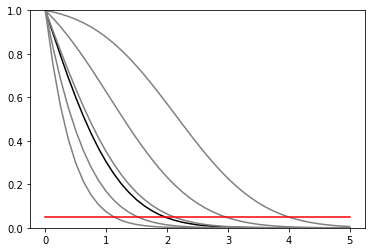

In [57]:
pdf = p
%pylab inline
data = [100.,100.] + pdf.config.auxdata

init_pars  = pdf.config.suggested_init()
par_bounds = pdf.config.suggested_bounds()

mutests = np.linspace(0,5,41)
tests = [runOnePoint(muTest, data,pdf,init_pars,par_bounds)[-2:] for muTest in mutests]
cls_obs = [test[0]  for test in tests]
cls_exp = [[test[1][i]  for test in tests] for i in range(5)]

plot_results(mutests, cls_obs, cls_exp)